### Elementary Webscraping with BS4 and Python

As a newbie to data science, one of the main challenge you will face in the near future is scarcity of data. The only way to solve this problem when all other options available to you have been explored is to source for data by scraping the web for appropriate data. So today, I will guide you on your baby steps towards webscraping using BS4 and python, in order to create your own dataset when necessary. 

This scraping was done on 9th July 2023 on Coinmarketcap(CMC) platform for learning purposes only. 

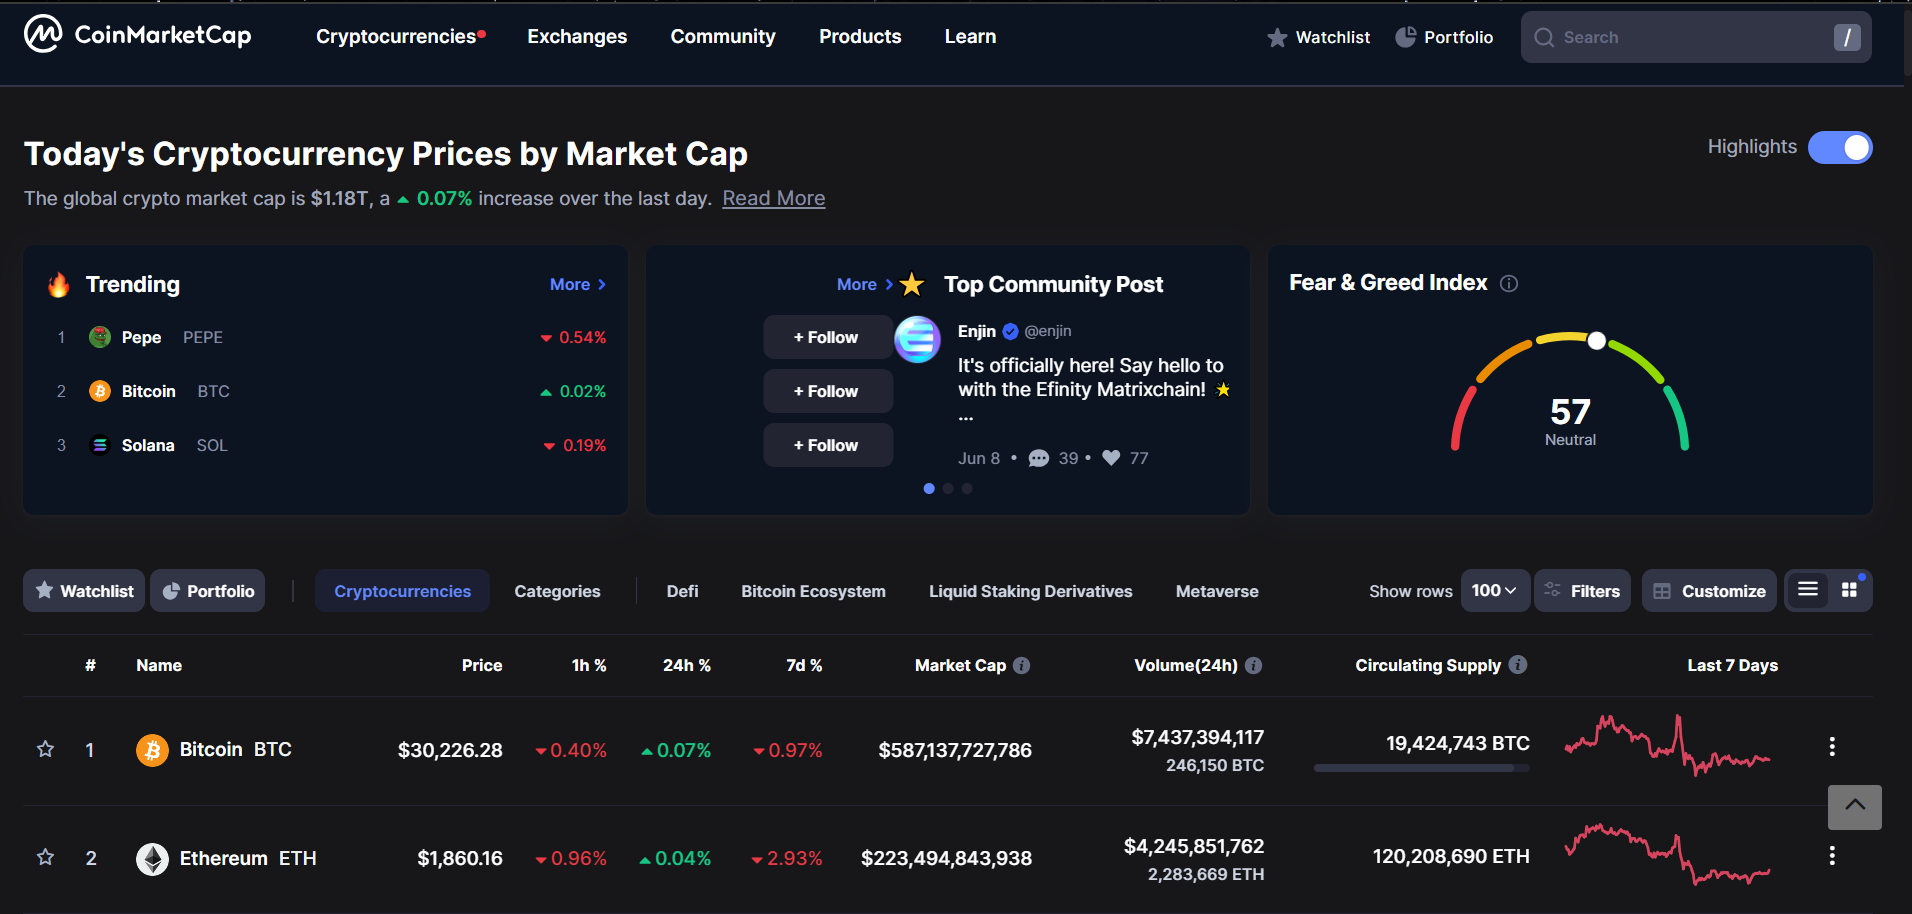

Our Objectives include:
1. Get the columns which contains (rank, name, symbol, price, market cap and daily trading volume).
2. Transform the retrieved data to a pandas datafram.
3. Save the dataframe on our local machine for future reference.

Necessary libraries: 
1. Pandas
2. BeautifulSoup

This tutorial was created using Jupyter notebook, to install the necessary library your run the following command:

In [2]:
%pip install pandas
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


I have those libraries already installed. I tried to reinstall it for the purpose of learning.

In [3]:
import pandas as pd 
import requests 
from bs4 import BeautifulSoup 

In [4]:
url = "https://coinmarketcap.com/"
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')

When someone wants to take a book on any  from the bookshelf, they take sthe following steps:
1. they first go to the room or library, 
2. locate the particular bookshelf,
3. take the book.

The same applies when you want to scrap data. In our case we want to scrap data on the table containing different information about cryptocurrency coins. 

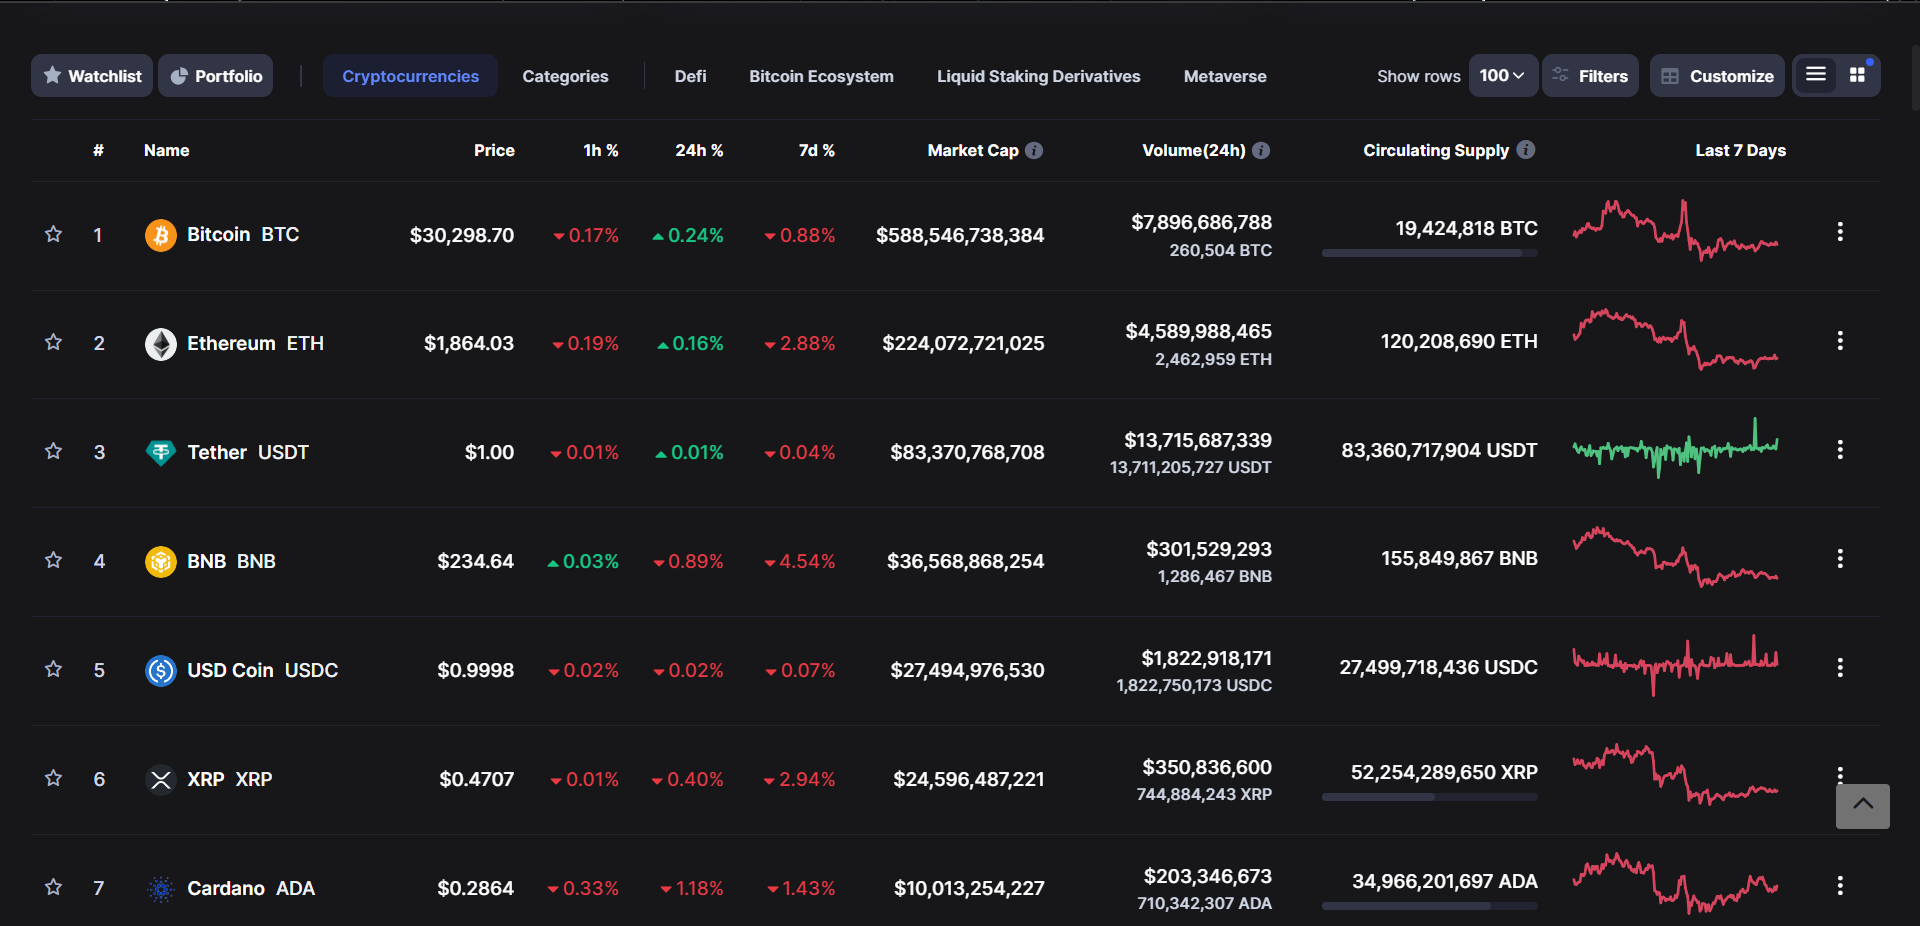

The table looks complex, we just want to get few data which includes:
1. Rank of coin
2. Name of coin
3. Symbol
4. Price of coin in USD
5. Market capilization
6. 24hr trade volume.


To achieve this, I will use the inspect tool to locate the html element containing the item on the web page. For instance, I want to locate the element containing bitcoin on the table. You can see bitcoin highlighted in yellow

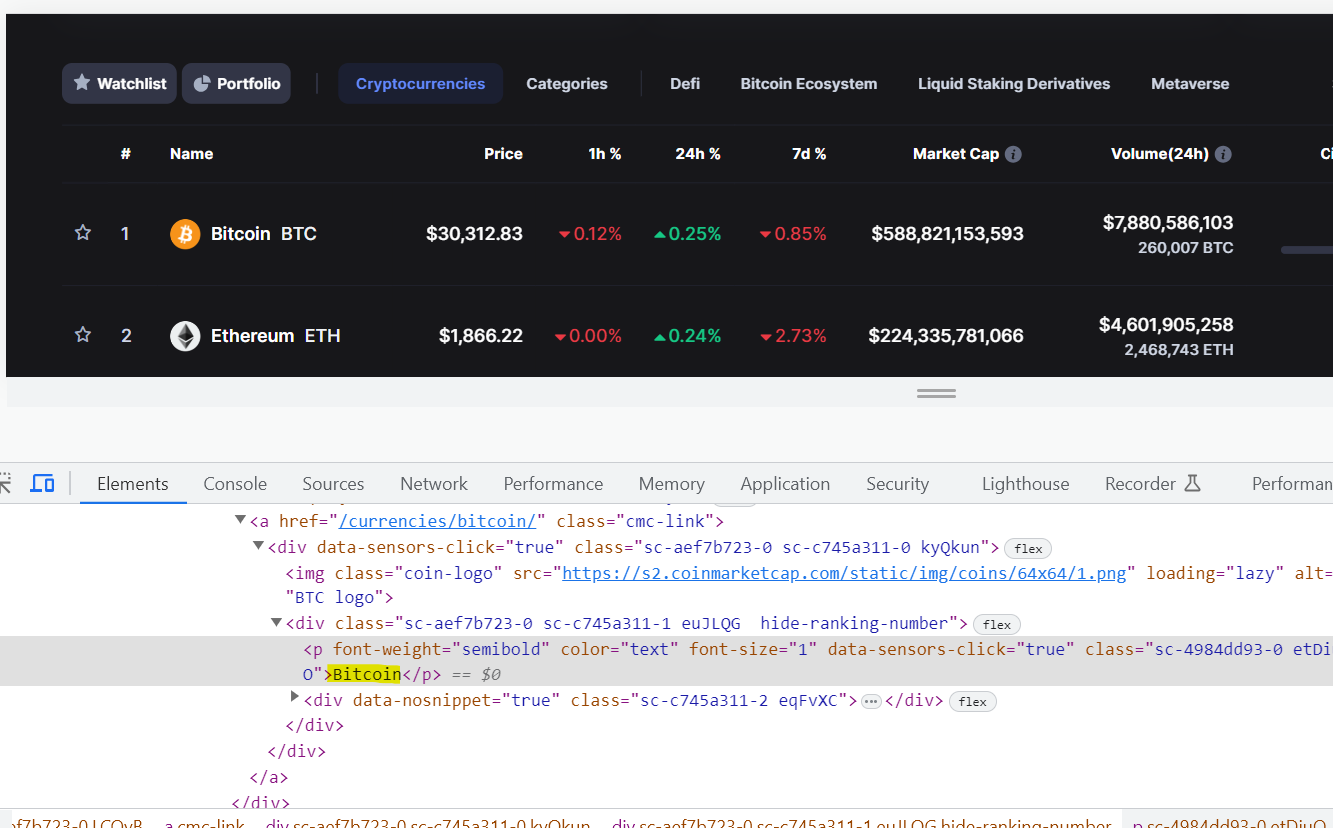

In the inspection window, you have to scroll up to locate the parent element containing the table we just inspected. You will find it to be the <tbody> tag. To access its content, I will make an instance of beautifulsoup and pass the tbody as an argument to it like below.

In [5]:
page = soup.find('tbody')
# print(page) prints unreadable HTML code
print(page)

<tbody><tr><td><span class="sc-c0b4ee1-2 bwyOyZ"></span></td><td style="text-align:start"><p class="sc-4984dd93-0 iWSjWE" color="text2" data-sensors-click="true" font-size="14">1</p></td><td style="text-align:start"><div class="sc-aef7b723-0 LCOyB" display="flex"><a class="cmc-link" href="/currencies/bitcoin/"><div class="sc-aef7b723-0 sc-c745a311-0 kyQkun" data-sensors-click="true"><img alt="BTC logo" class="coin-logo" loading="lazy" src="https://s2.coinmarketcap.com/static/img/coins/64x64/1.png"/><div class="sc-aef7b723-0 sc-c745a311-1 ehpgNK hide-ranking-number"><p class="sc-4984dd93-0 kKpPOn" color="text" data-sensors-click="true" font-size="1" font-weight="semibold">Bitcoin</p><div class="sc-c745a311-2 eqFvXC" data-nosnippet="true"><p class="sc-4984dd93-0 iqdbQL coin-item-symbol" color="text3" data-sensors-click="true" font-size="1">BTC</p></div></div></div></a></div></td><td style="text-align:end"><div class="sc-bc83b59-0 iVdfNf"><a class="cmc-link" href="/currencies/bitcoin/mark

In [6]:
# prettify() renders the retrieved as a readable HTML code
print(page.prettify())

<tbody>
 <tr>
  <td>
   <span class="sc-c0b4ee1-2 bwyOyZ">
   </span>
  </td>
  <td style="text-align:start">
   <p class="sc-4984dd93-0 iWSjWE" color="text2" data-sensors-click="true" font-size="14">
    1
   </p>
  </td>
  <td style="text-align:start">
   <div class="sc-aef7b723-0 LCOyB" display="flex">
    <a class="cmc-link" href="/currencies/bitcoin/">
     <div class="sc-aef7b723-0 sc-c745a311-0 kyQkun" data-sensors-click="true">
      <img alt="BTC logo" class="coin-logo" loading="lazy" src="https://s2.coinmarketcap.com/static/img/coins/64x64/1.png"/>
      <div class="sc-aef7b723-0 sc-c745a311-1 ehpgNK hide-ranking-number">
       <p class="sc-4984dd93-0 kKpPOn" color="text" data-sensors-click="true" font-size="1" font-weight="semibold">
        Bitcoin
       </p>
       <div class="sc-c745a311-2 eqFvXC" data-nosnippet="true">
        <p class="sc-4984dd93-0 iqdbQL coin-item-symbol" color="text3" data-sensors-click="true" font-size="1">
         BTC
        </p>
       </div>


Do you still remember the library scenario? No I am in the library. I will go to the shelf, which is tbody in our case, where the book is stored and take it for my use. At this stage I have all the data I need for this miniproject. I will proceed to find all the child element of the tbody. From the inspect window they are wrapped in tr tag. 
To get all the tr tag, I will call the find_all() method.

In [7]:
coin_info = page.find_all('tr')

Now, let's view all the tr tag

In [10]:
coin_info

[<tr><td><span class="sc-c0b4ee1-2 bwyOyZ"></span></td><td style="text-align:start"><p class="sc-4984dd93-0 iWSjWE" color="text2" data-sensors-click="true" font-size="14">1</p></td><td style="text-align:start"><div class="sc-aef7b723-0 LCOyB" display="flex"><a class="cmc-link" href="/currencies/bitcoin/"><div class="sc-aef7b723-0 sc-c745a311-0 kyQkun" data-sensors-click="true"><img alt="BTC logo" class="coin-logo" loading="lazy" src="https://s2.coinmarketcap.com/static/img/coins/64x64/1.png"/><div class="sc-aef7b723-0 sc-c745a311-1 ehpgNK hide-ranking-number"><p class="sc-4984dd93-0 kKpPOn" color="text" data-sensors-click="true" font-size="1" font-weight="semibold">Bitcoin</p><div class="sc-c745a311-2 eqFvXC" data-nosnippet="true"><p class="sc-4984dd93-0 iqdbQL coin-item-symbol" color="text3" data-sensors-click="true" font-size="1">BTC</p></div></div></div></a></div></td><td style="text-align:end"><div class="sc-bc83b59-0 iVdfNf"><a class="cmc-link" href="/currencies/bitcoin/markets/">

### 1. Get the columns which contains (rank, name, symbol, price, market cap and daily trading volume).

From the output displayed, you can see that we have multiple tr tags. We will need our basic knowlege of python list in other to get the content of the tr tag. 

First we will make a list to capture the Rank, Name, Symbol, Price, Marketcap, Volume24hr of each coin.

In [12]:
rank = []
name = []
symbol = []
price = []
mcap = []
vol = []

Next, we will take advantage of python's loop structure to loop through the content of the tr and store each of the necessary field in the list we create before, after each iteration.

### Problems Encoutered

#### Dynamic (changing) Classname.
On Coinmarketcap(CMC) website, CMC some field e.g. (Price) has dynamic classes. Web developers esp Js developers today implement anti-scrapping strategies by generating random class names for each page load or any change in the web page. Coinmarketcap did the same, However, i retrieved the data i want by calling on a the parent element. Its class name changes between sc-bc83b59-0 iVdfNf fall, sc-bc83b59-0 iVdfNf rise and sc-bc83b59-0 iVdfNf. So, i figured out that 'sc-bc83b59-0 iVdfNf' is the base class name.

#### App breaks after ten records

I observed also that Web scraping code with BeautifulSoup4 and python on Coinmarketcap break after ten records. This is because the first ten results are in the HTML you get back. However, the rest is added dynamically by JavaScript, so BeautifulSoup won't see this because it's simply not there. Answer from stackoverflow:
https://stackoverflow.com/questions/66334006/scraping-coinmarketcap-data-returns-only-the-first-10-results-why-the-rest-90-d

To fix this I used a counter itr to limit the number of records returned to just ten as you can see in the code.

In [13]:
itr = 0
for coin in coin_info:
    if itr == 10:
        break
    #pub_date = job.find('span', class_='sim-posted').text
    #if 'few' in pub_date:
    rank.append(coin.find('p', class_='sc-4984dd93-0 iWSjWE').text)
    name.append(coin.find('p', class_='sc-4984dd93-0 kKpPOn').text)
    symbol.append(coin.find('p', class_='sc-4984dd93-0 iqdbQL coin-item-symbol').text)
    price.append(coin.find('div', class_='sc-bc83b59-0 iVdfNf').span.text)
    mcap.append(coin.find('span',class_='sc-f8982b1f-1 bOsKfy').text)
    vol.append(coin.find('p', class_='sc-4984dd93-0 jZrMxO font_weight_500').text)
    itr+=1
    

### 2. Transform the retrieved data to a pandas datafram

In [14]:
data = {'Rank': rank, 'Name': name, 'Symbol': symbol, 'Price': price, 'Marketcap': mcap, 'Volume24hr': vol}
df = pd.DataFrame(data)

In [15]:
df

,Rank,Name,Symbol,Price,Marketcap,Volume24hr
0,1,Bitcoin,BTC,"$30,192.68","$586,530,639,814","$9,481,874,965"
1,2,Ethereum,ETH,"$1,862.88","$223,939,285,587","$5,182,652,060"
2,3,Tether,USDT,$0.9999,"$83,353,625,131","$16,959,112,293"
3,4,BNB,BNB,$241.89,"$37,698,114,967","$511,676,841"
4,5,USD Coin,USDC,$0.9999,"$27,486,483,707","$2,309,330,530"
5,6,XRP,XRP,$0.4717,"$24,650,697,525","$585,031,091"
6,7,Cardano,ADA,$0.2853,"$9,977,514,558","$223,680,838"
7,8,Dogecoin,DOGE,$0.06478,"$9,076,315,350","$198,873,493"
8,9,Solana,SOL,$20.73,"$8,342,859,149","$441,346,110"
9,10,TRON,TRX,$0.07677,"$6,896,977,926","$177,143,311"


### 3. Save the dataframe on our local machine for future reference.

In [16]:
df.to_csv('C:/Users/LENOVO/Desktop/bitcoin.csv', index=False)

Here is the dataset on excel
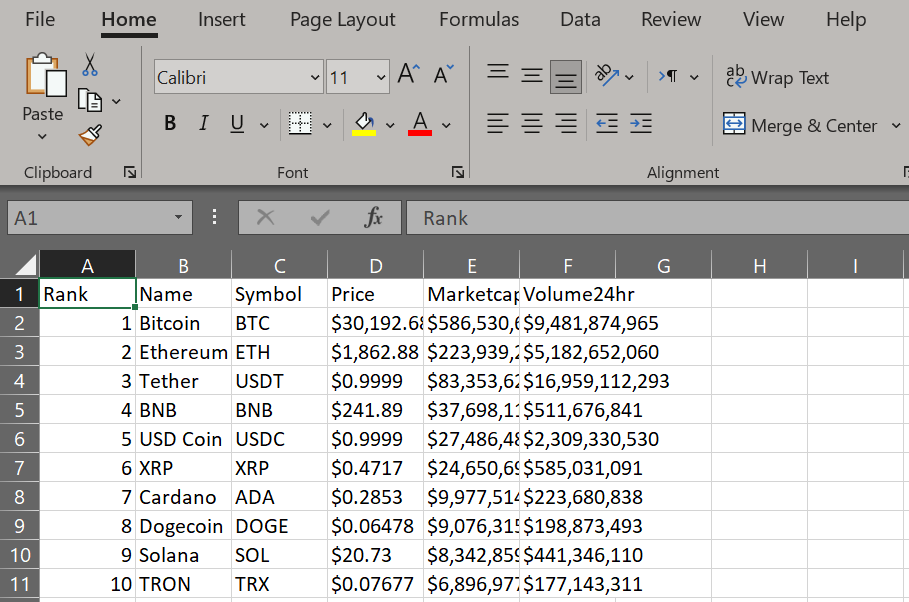

Lastly, let us view the data using Pandas.

In [17]:
data = pd.read_csv('C:/Users/LENOVO/Desktop/bitcoin.csv')

In [18]:
data.head()

,Rank,Name,Symbol,Price,Marketcap,Volume24hr
0,1,Bitcoin,BTC,"$30,192.68","$586,530,639,814","$9,481,874,965"
1,2,Ethereum,ETH,"$1,862.88","$223,939,285,587","$5,182,652,060"
2,3,Tether,USDT,$0.9999,"$83,353,625,131","$16,959,112,293"
3,4,BNB,BNB,$241.89,"$37,698,114,967","$511,676,841"
4,5,USD Coin,USDC,$0.9999,"$27,486,483,707","$2,309,330,530"


We are lucky our data is clean; no missing or inappropriate values. At this point you can take your learning further by building your own web scrapping project.

Happy Scrapping.